In [38]:
import streamlit as st
import pandas as pd


In [41]:
data = pd.read_csv('insurance.csv')

In [42]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [43]:
print("no.of rows",data.shape[0])
print("no.of columns",data.shape[1])

no.of rows 1338
no.of columns 7


In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [45]:
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [46]:
data.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


In [47]:
data['sex'].unique()

array(['female', 'male'], dtype=object)

In [48]:
data['sex']=data['sex'].map({'female':0,'male':1})

In [49]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520


In [50]:
data['smoker']=data['smoker'].map({'no':0,'yes':1})

In [51]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [52]:
data['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [53]:
data['region']=data['region'].map({'southwest':1,'southeast':2,'northwest':3,'northeast':4})

In [54]:
x=data.drop(['charges'],axis=1)

In [57]:
y=data['charges']

In [58]:
from sklearn.model_selection import train_test_split


In [59]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [60]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [61]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [62]:
lr = LinearRegression()
lr.fit(x_train,y_train)
svm = SVR()
svm.fit(x_train,y_train)
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
gr = GradientBoostingRegressor()
gr.fit(x_train,y_train)

GradientBoostingRegressor()

In [63]:
y_pred1 = lr.predict(x_test)
y_pred2 = svm.predict(x_test)
y_pred3 = rf.predict(x_test)
y_pred4 = gr.predict(x_test)

df1 = pd.DataFrame({'Actual':y_test,'lr':y_pred1,'svm':y_pred2,'rf':y_pred3,'gr':y_pred4})

In [64]:
import matplotlib.pyplot as plt

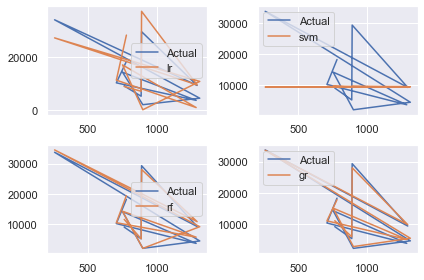

In [65]:
plt.subplot(221)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['lr'].iloc[0:11],label="lr")
plt.legend()

plt.subplot(222)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['svm'].iloc[0:11],label="svm")
plt.legend()

plt.subplot(223)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['rf'].iloc[0:11],label="rf")
plt.legend()

plt.subplot(224)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['gr'].iloc[0:11],label="gr")
plt.legend()

plt.tight_layout()

In [66]:
from sklearn import metrics

In [67]:
score1 = metrics.r2_score(y_test,y_pred1)
score2 = metrics.r2_score(y_test,y_pred2)
score3 = metrics.r2_score(y_test,y_pred3)
score4 = metrics.r2_score(y_test,y_pred4)

In [68]:
print(score1,score2,score3,score4)

0.7833463107364539 -0.07229762787861826 0.8644196944681783 0.877993618163719


In [69]:
s1 = metrics.mean_absolute_error(y_test,y_pred1)
s2 = metrics.mean_absolute_error(y_test,y_pred2)
s3 = metrics.mean_absolute_error(y_test,y_pred3)
s4 = metrics.mean_absolute_error(y_test,y_pred4)

In [70]:
data = {'age':40,'sex':1,'bmi':40.30,'children':4,'smoker':1,'region':2}

df = pd.DataFrame(data,index=[0])
df

,age,sex,bmi,children,smoker,region
0,40,1,40.3,4,1,2


In [71]:
new_pred = gr.predict(df)
print(new_pred)

[43931.13613049]


In [72]:
gr = GradientBoostingRegressor()
gr.fit(x,y)

GradientBoostingRegressor()

In [75]:
import joblib

In [76]:
joblib.dump(gr,'model_joblib_gr')

['model_joblib_gr']

In [77]:
model = joblib.load('model_joblib_gr')

In [78]:
model.predict(df)

array([42148.361888])

In [85]:
from tkinter import *

In [97]:
master = Tk()

def show_entry():
    p1 = float(e1.get())
    p2 = float(e2.get())
    p3 = float(e3.get())
    p4 = float(e4.get())
    p5 = float(e5.get())
    p6 = float(e6.get())
    result = model.predict([[p1,p2,p3,p4,p5,p6]])
    label(master, text = "Insurance Cost").grid(row = 7)
    label(master, text = result).grid(row=8)






master.title("insurance cost prediction")
label = Label(master,text = "insurance cost prediction",bg = "black",fg = "white").grid(row=0,columnspan=2)
Label =(master,text = "Enter your age").grid(row=1)
Label =(master,text = "Male or Female [1/0]").grid(row=2)
Label =(master,text = "Enter your BMI").grid(row=3)
Label =(master,text = "Enter no of children").grid(row=4)
Label =(master,text = "Smoker yes/no[1/0]").grid(row=5)
Label =(master,text = "Enter Region[1-4]").grid(row=6)
        e1 = Entry(master)
        e2 = Entry(master)
        e3 = Entry(master)
        e4 = Entry(master)
        e5 = Entry(master)
        e6 = Entry(master)
    
        
e1.grid(row=1,column=1)
e2.grid(row=2,column=2)
e3.grid(row=3,column=3)
e4.grid(row=4,column=4)
e5.grid(row=5,column=5)
e6.grid(row=6,column=6)
        
Button(master,text ="Predict",command = show_entry).grid


        
        

mainloop()

SyntaxError: invalid syntax. Maybe you meant '==' or ':=' instead of '='? (1406266931.py, line 21)